# DeepDriveMD with fs-peptide

## Configuration

- Node count: 10 nodes on Summit, 60 GPUs
- Iteration count: 10
- contact matrix size: [22,22,1] for fs-peptide
- Simulation length: 5ns for the first and then 1ns
- Retraining interval: every 5th iteration i.e. iter1 out of 5 iterations
- Walltime: 2 hours


In [1]:
import pandas as pd

## Raw data (collected manually)

In [2]:
res = {'md': [352, 78, 79, 79, 79, 88, 88, 87, 85, 90], 
       'hdf5': [4, 0, 0, 0, 0, 6, 0, 0, 0, 0], 
       'cvae': [634, 0, 0, 0, 0, 666, 0, 0, 0, 0], 
       'infer': [459, 469, 466, 471, 472, 468, 495, 496, 495, 496]}


## Accumulated stage durations

Text(0.5, 0, 'fs-pep/2hr/60GPUs')

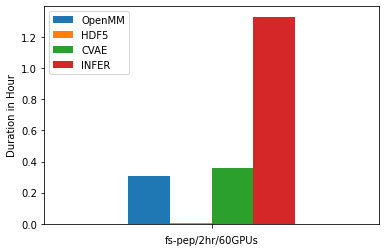

In [3]:
df = pd.DataFrame({"OpenMM": sum(res['md'])/3600,
                  "HDF5":sum(res['hdf5'])/3600,
                  "CVAE":sum(res['cvae'])/3600,
                  "INFER":sum(res['infer'])/3600},index=[''])
ax=df.plot.bar(rot=0)
ax.set_ylabel('Duration in Hour')
ax.set_xlabel('fs-pep/2hr/60GPUs')

## Stage duration on each iteration

In [4]:
index = [ "iter-%s" % x for x in range(1,11) ]

Text(0, 0.5, 'Duration in Minute')

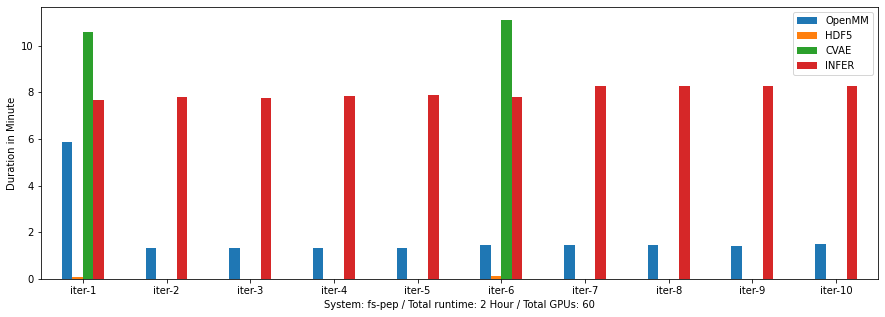

In [5]:
df = pd.DataFrame({"OpenMM": [ x / 60 for x in res['md']],
                  "HDF5":[ x / 60 for x in res['hdf5']],
                  "CVAE":[ x / 60 for x in res['cvae']],
                  "INFER":[ x / 60 for x in res['infer']]}, index=index)
ax=df.plot.bar(rot=0,figsize=(15,5))
ax.set_xlabel("System: fs-pep / Total runtime: 2 Hour / Total GPUs: 60")
ax.set_ylabel('Duration in Minute')

## TTX in seconds

In [6]:
ttx=0
for x in res:
    ttx += sum(res[x])
ttx

7202

## GPU Utilization

In [7]:
tot=0
util=0
for r in res:
    tot += sum(res[r])
    if r == "md":
        util += sum(res[r])
    if r == "hdf5":
        util += sum(res[r])*1/60
    if r == "cvae":
        util += sum(res[r])*6/60
    if r == "infer":
        util += sum(res[r])*1/60

from pprint import pprint
pprint({"GPU (sec) fully utilized":util,
       "TTX (sec)": tot,
       "GPU Utilization (%)": 100*util/tot})

{'GPU (sec) fully utilized': 1314.95,
 'GPU Utilization (%)': 18.25812274368231,
 'TTX (sec)': 7202}
